# Probability distributions II

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Continuous-probability-distributions" data-toc-modified-id="Continuous-probability-distributions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Continuous probability distributions</a></span><ul class="toc-item"><li><span><a href="#Uniform-distribution-on-interval-[0,-1]" data-toc-modified-id="Uniform-distribution-on-interval-[0,-1]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Uniform distribution on interval [0, 1]</a></span></li><li><span><a href="#Uniform-distribution-on-interval-[a,-b]" data-toc-modified-id="Uniform-distribution-on-interval-[a,-b]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Uniform distribution on interval [a, b]</a></span></li><li><span><a href="#Exponential-distribution" data-toc-modified-id="Exponential-distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exponential distribution</a></span></li><li><span><a href="#Normal-distribution" data-toc-modified-id="Normal-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Normal distribution</a></span><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#scipy's-norm" data-toc-modified-id="scipy's-norm-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>scipy's <code>norm</code></a></span></li><li><span><a href="#Sampling-from-a-normal" data-toc-modified-id="Sampling-from-a-normal-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Sampling from a normal</a></span></li><li><span><a href="#Point-distribution-function-(density-function)" data-toc-modified-id="Point-distribution-function-(density-function)-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Point distribution function (density function)</a></span></li><li><span><a href="#Cumulative-distribution-function" data-toc-modified-id="Cumulative-distribution-function-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Cumulative distribution function</a></span></li><li><span><a href="#Percent-point-function" data-toc-modified-id="Percent-point-function-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>Percent point function</a></span></li></ul></li><li><span><a href="#Other-continuous-probability-distributions" data-toc-modified-id="Other-continuous-probability-distributions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Other continuous probability distributions</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# for some extra plotting tools
import pylab as p

## Continuous probability distributions

**Continuous probability** distributions are those which can take any value in a given range. In particular, they can take infinite different values.

X is a continuous random variable.  
X follows a continuous probability distribution.

### Uniform distribution on interval [0, 1]

All numbers in the inteval [0, 1] are equally probable

In a continuous probability distribution, it only makes sense to talk about probability of an interval, not a particular number

$X \sim U(0, 1)$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Unit-interval.svg/1200px-Unit-interval.svg.png" width=500>

$P(x \leq 0.4)=0.4$

$P(x \geq 0.7)=0.3$

$P(x \leq 1)= 1$

$P(x \geq 0)=1$

$P(0.1 \leq x \leq 0.4)=0.4 - 0.1=0.3$

For all $c, d \in [0, 1]$ we have 

$$P(c < x <= d) = d-c$$

Lets use Python distribution instantiation to generate samples from a $U(0, 1)$ distribution

In [16]:
from scipy.stats import uniform

In [17]:
my_uniform = uniform(0, 1)

In [23]:
my_uniform.rvs(size=1)

array([0.99458671])

In [24]:
sample = my_uniform.rvs(size=10)

In [25]:
sample

array([0.78456069, 0.83175183, 0.3622387 , 0.24349204, 0.52834664,
       0.61156342, 0.99547219, 0.34494371, 0.10575531, 0.27557212])

<AxesSubplot:ylabel='Count'>

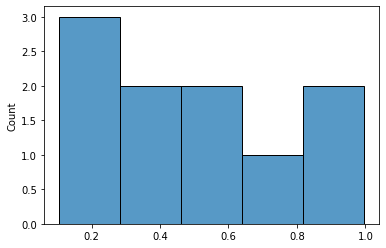

In [26]:
sns.histplot(sample)

In [29]:
sample = my_uniform.rvs(size=100)

<AxesSubplot:ylabel='Count'>

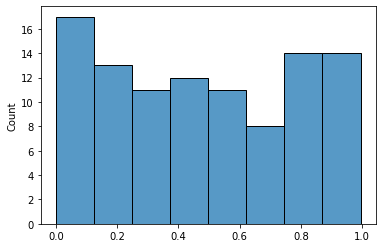

In [30]:
sns.histplot(sample)

In [36]:
sample = my_uniform.rvs(size=1000)

<AxesSubplot:ylabel='Count'>

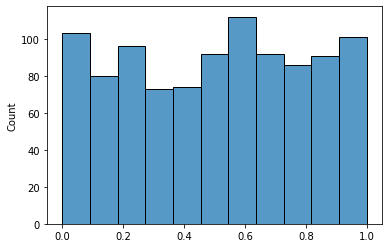

In [37]:
sns.histplot(sample)

In [38]:
sample.mean()

0.5070647003188253

In [39]:
my_uniform.mean()

0.5

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

In [40]:
my_uniform.cdf(1)

1.0

In [41]:
my_uniform.cdf(0)

0.0

In [42]:
my_uniform.cdf(0.5)

0.5

In [43]:
my_uniform.cdf(0.4)

0.4

It happens that  
$P(0.2 < X < 0.7) = P(X < 0.7) - P(X < 0.2)$

since  
$P(X < 0.2) + P(0.2 < X < 0.7) = P(X < 0.7)$

In [44]:
my_uniform.cdf(0.7) - my_uniform.cdf(0.2)

0.49999999999999994

### Uniform distribution on interval [a, b]

All numbers in the inteval [a, b] are equally probable

$X \sim U(a, b)$

$P(x \leq b)=1$

$P(x \geq a)=1$

$\frac{a+b}{2}$ is the mean between $a$ and $b$

$P(x \leq \frac{a+b}{2})=0.5$

Lets use Python distribution instantiation to generate samples from a $U(a, b)$ distribution

In [45]:
from scipy.stats import uniform

In [47]:
a, b = 4, 10

In [48]:
# h is the interval length
h = b - a
h

6

`uniform` receives `a` and `h`

In [49]:
my_uniform = uniform(loc=a, scale=h)

`.rvs` generates a sample drawn from the distribution

In [59]:
my_uniform.rvs(size=1)

array([5.46608233])

In [60]:
sample = my_uniform.rvs(size=100)

In [61]:
sample.mean()

6.983197770251828

<AxesSubplot:ylabel='Count'>

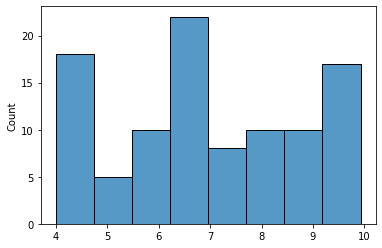

In [62]:
sns.histplot(sample)

In [63]:
sample = my_uniform.rvs(size=1000)

<AxesSubplot:ylabel='Count'>

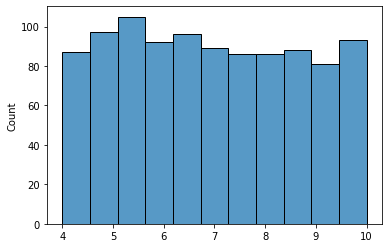

In [64]:
sns.histplot(sample)

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

In [65]:
my_uniform.cdf(11)

1.0

In [66]:
my_uniform.cdf(10)

1.0

In [67]:
my_uniform.cdf(9.9)

0.9833333333333334

In [68]:
my_uniform.cdf(4)

0.0

In [69]:
my_uniform.cdf(7)

0.5

In [70]:
my_uniform.cdf(8)

0.6666666666666666

Lets plot the cdf

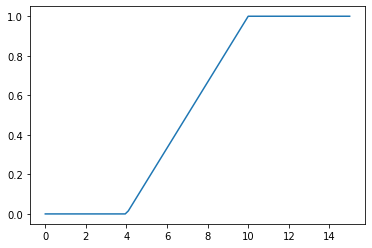

In [73]:
x = np.linspace(0, 15, 100)
y = my_uniform.cdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

- The cdf of a distribution is an increasing function
- The cdf takes value 1 at the right
- The cdf takes value 0 at the left

In [74]:
my_uniform.mean()

7.0

In [76]:
sample.std()

1.730343108981405

In [77]:
my_uniform.std()

1.7320508075688772

### Exponential distribution

Models the time it takes for a random event to occur:
 * Time for next person in a queue to appear
 * Time for next call at call center to happen
 * Time for next radioactive particle to decay
 * Time for next DNA item to mutate

"The average time for a new patient to appear is 5 minutes"  
"The time for a new patient to appear follows an Exponential distribution with mean $5$"

The exponential is the reciprocal distribution of the Poisson distribution

In [78]:
from scipy.stats import expon

The exponential, like the Poisson, is a $1$-parameter distribution function

$X \sim Exp(\mu)$

This parameter is the mean, called `mu`, $\mu$

`scipy` calls it `scale`

Lets model clients who arrive on average every $30$ seconds to supermarket queue

In [79]:
my_e = expon(scale=30)

In [80]:
my_e.mean()

30.0

`.rvs` generates a sample drawn from the distribution

In [93]:
my_e.rvs(size=1).round()

array([122.])

In [101]:
sample = my_e.rvs(size=100)

In [102]:
sample.round()

array([  3.,   8.,  16.,  67.,  60.,   4.,  15.,   8.,  81.,   5.,  78.,
         8.,  13.,  28.,  12.,  18.,   2.,  40.,  21.,  30.,   3.,  11.,
        31.,  55.,   5.,  28.,  33., 162.,  57.,  29.,  13.,  32.,   3.,
        70.,  80.,  15.,  46.,   9., 160.,  51.,  18.,  21., 102.,  76.,
         3.,  30.,  15.,  14.,  19.,  33.,  47.,  13.,  71.,   5.,   7.,
        21.,  26.,   2.,   0.,   7.,  16.,   4.,   6.,  29.,  33.,  90.,
        72.,  20.,   4.,   7.,   3.,   3.,  10.,  10.,  10., 133.,   3.,
        33.,  16.,  13.,  95.,  19.,  22.,  57.,  29.,  67.,  23.,   5.,
         7.,   0.,  47.,   3.,  22.,   4.,   6.,  25.,  42.,  21.,  28.,
        15.])

In [103]:
sample.max()

162.22555171963174

<AxesSubplot:ylabel='Count'>

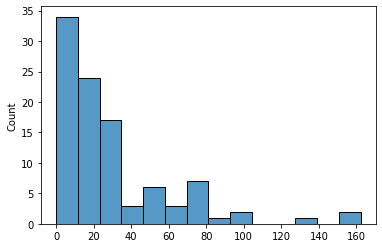

In [104]:
sns.histplot(sample)

In [105]:
sample = my_e.rvs(size=10000)

<AxesSubplot:ylabel='Count'>

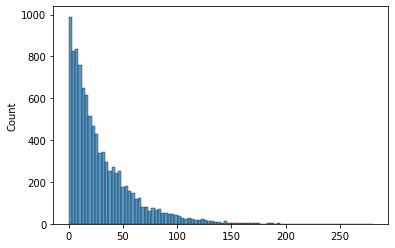

In [106]:
sns.histplot(sample)

In [107]:
my_e.cdf(30)

0.6321205588285577

`.pdf` is the point distribution function 

Analogous to `.pmf` in discrete

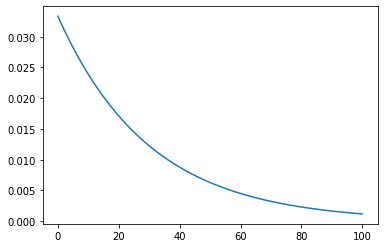

In [108]:
x = np.linspace(0, 100, 100)
y = my_e.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

The area under the curve is the probability of times in  the given interval

The whole area is 1 (100%)

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

In [110]:
my_e.cdf(10)

0.28346868942621073

In [112]:
my_e.cdf(30)

0.6321205588285577

In [113]:
my_e.cdf(90)

0.950212931632136

In [115]:
my_e.cdf(150)

0.9932620530009145

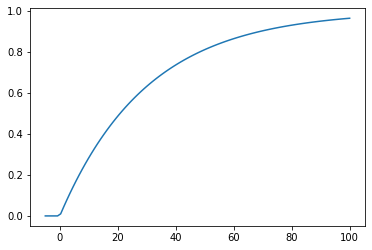

In [116]:
x = np.linspace(-5, 100, 100)
y = my_e.cdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

### Normal distribution

#### Intro

Normal distributions are important in statistics and are often used in the natural and social sciences 

The normal distribution is the most important probability distribution in statistics, because it fits many natural and social phenomena :
 * heights
 * blood pressure
 * IQ scores
 

It is also known as the Gaussian distribution or the bell curve

#### scipy's `norm`

In [119]:
from scipy.stats import norm

The normal, unilike the exponential, is a $2$-parameter distribution function

$X \sim N(\mu, \sigma)$

These parameters are:
 * the mean, called $\mu$
 * the standard deviation, $\sigma$

`scipy` calls them `loc` and `scale`

Lets model a country in which heights have:
 * a mean of $170cm$
 * a std of $10cm$

In [120]:
my_normal = norm(loc=170, scale=10)

In [121]:
my_normal.mean()

170.0

In [122]:
my_normal.std()

10.0

#### Sampling from a normal

`.rvs` generates a sample drawn from the distribution

In [129]:
my_normal.rvs(size=1)

array([190.84104658])

In [130]:
sample = my_normal.rvs(size=100)

In [131]:
# lets show some
sample[:15]

array([191.23985944, 166.88003407, 171.94819751, 168.50637905,
       179.41174977, 165.4095862 , 170.7496152 , 167.61252649,
       160.58405673, 176.63501966, 165.41296938, 174.21803731,
       178.42480128, 168.5475226 , 169.65952261])

<AxesSubplot:ylabel='Count'>

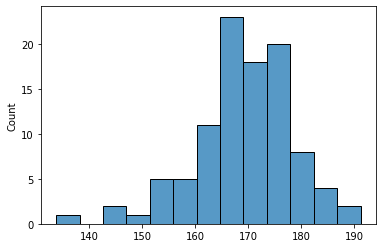

In [132]:
sns.histplot(sample)

In [133]:
sample = my_normal.rvs(size=10000)

<AxesSubplot:ylabel='Count'>

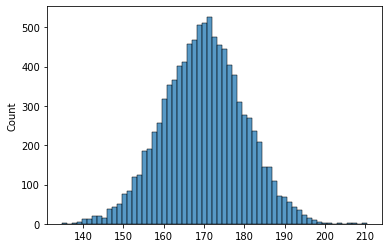

In [134]:
sns.histplot(sample)

#### Point distribution function (density function)

`.pdf` is the point distribution function 

In [135]:
my_normal_2 = norm(170, 15)

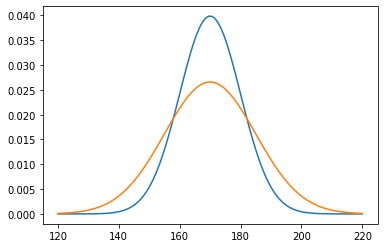

In [136]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)
y2 = my_normal_2.pdf(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)
ax.plot(x, y2)

In [137]:
my_normal.pdf(160)

0.024197072451914336

In [138]:
my_normal.pdf(165)

0.03520653267642995

Total area under the curve is 1

#### Cumulative distribution function

`.cdf` is the cumulative distribution function  
`.cdf(x)` tells us the probability of $X<x$

For this distribution being **continuous**, we cannot SUM several .pdf values, but we have to INTEGRATE (area under the curve) until 170

$P(X < 170)$

In [139]:
my_normal.cdf(170)

0.5

In [140]:
my_normal.cdf(140)

0.0013498980316300933

In [141]:
my_normal.cdf(160)

0.15865525393145707

In [142]:
import pylab as p

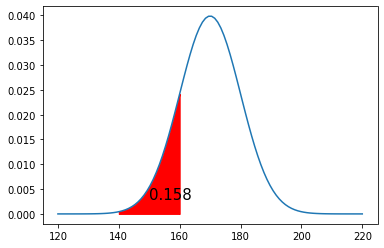

In [143]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
fill_x = np.linspace(140, 160, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x),color='r')
plt.text(150, 0.003, "0.158", size=15)
ax.plot(x,y)

In [144]:
my_normal.cdf(200)

0.9986501019683699

What is the proportion of people in the interval ($\mu - \sigma, \mu + \sigma)$?

$P(160 < X < 180)$

In [146]:
my_normal.cdf(180) - my_normal.cdf(160)

0.6826894921370859

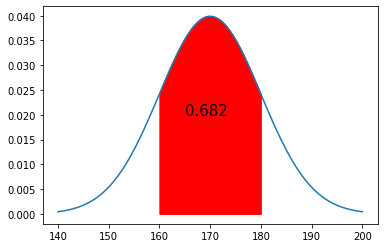

In [145]:
x = np.linspace(140, 200, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
fill_x = np.linspace(160, 180, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x),color='r')
plt.text(165, 0.02, "0.682", size=15)
ax.plot(x,y)

What is the proportion of people in the interval ($\mu - 2\sigma, \mu + 2\sigma)$?

What is the proportion of people in the interval ($\mu - 3\sigma, \mu + 3\sigma)$?

In [147]:
my_normal.mean()

170.0

In [148]:
my_normal.std()

10.0

<img src="https://miro.medium.com/max/700/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

Lagartos   
Media 6.2  
Desv tipica 1

Entre 5.2 y 7.2 están el 68% de los lagartos

Entre 4.2 y 8.2 están el 95.45% de los lagartos

Entre 3.2 y 9.2 están el 99.73% de los lagartos

#### Percent point function

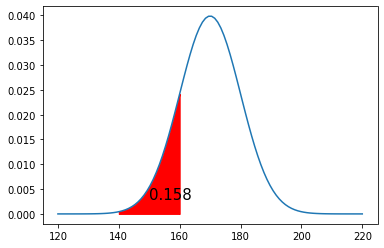

In [149]:
x = np.linspace(120, 220, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
fill_x = np.linspace(140, 160, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x),color='r')
plt.text(150, 0.003, "0.158", size=15)
ax.plot(x,y)

Is the inverse of the Cumulative Distribution function

cdf(height) = proba

ppf(proba) = height

What height is such that 80% of people are lower than it?

In [156]:
my_normal.ppf(0.8)

178.41621233572914

In [158]:
my_normal.ppf(0.99)

193.2634787404084

In [161]:
my_normal.ppf(0.99999)

212.6489079392384

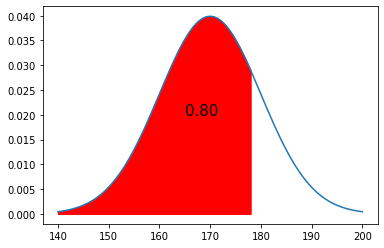

In [162]:
x = np.linspace(140, 200, 100)
y = my_normal.pdf(x)
fig, ax = plt.subplots(1, 1)
fill_x = np.linspace(140, 178, 100)
plt.fill_between(fill_x, my_normal.pdf(fill_x),color='r')
plt.text(165, 0.02, "0.80", size=15)
ax.plot(x,y)

### Other continuous probability distributions

 * Student's $t$ distribution (Student is a person)
 * Snedecor's $F$ distribution
 * Chi squared distribution

## Summary

 * Random variables model random experiments
 * We only need a sample space and probabilities to define a random experiment

 * Discrete random variables only have a finite (or countable) number of outcomes
 * Continuous random variables take an infinite number of outcomes

 * `.rvs` returns a sample
 * `.pmf` returns the point mass function (discrete distributions)
 * `.pdf` returns the point distribution function (continuous distributions)
 * `.cdf` returns the cumulative mass/distribution function (discrete/continuous)
 * `.ppf` return inverse cumulative distribution function (discrete/continuous). Aka percentile point function